<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فروشگاه محصولات اداری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین داده‌های مربوط به یک فروشگاه لوازم اداری به شما داده شده است.
نخست داده‌ها را از فایل 
<code>SuperStore.csv</code>
بخوانید و در متغیر <code>df</code> بریزید.
</font>
</p>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
from sklearn.preprocessing import power_transform
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

In [ ]:
df = pd.read_csv('SuperStore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با استفاده از کتابخانه plt نمودار سود (profit) رادر یک نمودار هیستوگرام رسم کنید.
تعداد ستون ها را حداقل 250 تا در نظر بگیرید.
هم چنین برای مشاهده بهتر نمودار، بازه سود را محدودتر کنید.
</font>
</p>

In [12]:
print(df.columns)

limit = df[(df['Profit'] >= -500) & (df['Profit'] <= 500)]

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


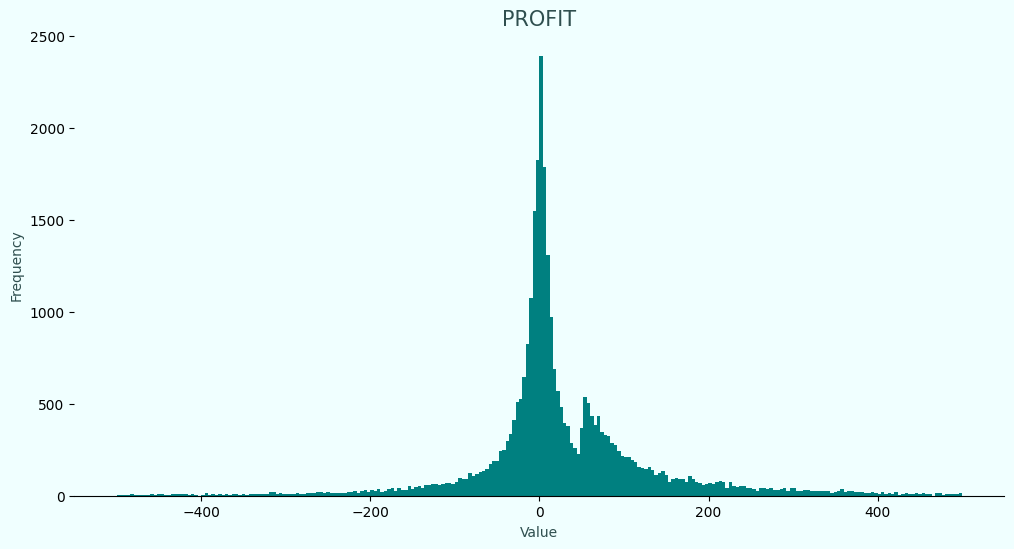

In [13]:
fig_profit = plt.figure(figsize=(12,6), facecolor='azure')
ax_profit = fig_profit.gca()
ax_profit.hist(limit['Profit'], bins= 250, color='teal')
ax_profit.set_title("PROFIT", color='darkslategrey', fontsize=15)
ax_profit.set_xlabel("Value", color='darkslategrey', fontsize=10)
ax_profit.set_ylabel("Frequency", color='darkslategrey', fontsize=10)
ax_profit.spines['left'].set_visible(False)
ax_profit.spines['right'].set_visible(False)
ax_profit.spines['top'].set_visible(False)
ax_profit.set_facecolor('azure')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>در این سوال میخواهیم شما ۲ فرضیه را مورد ارزیابی قرار دهید و نتایج خود را برای ما شرح دهید و در آن ها دقیق شوید.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در انتخاب مدل برای تست فرض و همچنین داده‌های لازم برای انجام تست بسیار دقت کنید .</font>
</p>



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض اول لازم است که سطرهای دیتافریم را طبق ستون نوع ارسال از هم جدا کنید.. </font>
</p><p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض دوم هم لازم است که فروش‌های با تخفیف را از بدون تخفیف‌ها جدا کنید. </font>
</p>

In [14]:
df = pd.read_csv('D:\Data Analysis - BC - Quera\W2\Trains\SuperStore.csv')

ship_mode = df.groupby('Ship Mode', as_index=False)['Profit'].mean()
print(ship_mode)
sale_discount = df[df['Discount'] != 0]
sale = df[df['Discount'] == 0]

        Ship Mode     Profit
0     First Class  34.951116
1        Same Day  36.556172
2    Second Class  36.516283
3  Standard Class  37.119374


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه اول</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
از شما میخواهیم که بررسی کنید که آیا روش ارسال‌های متفاوت (Ship Mode) روی میزان سودی که فروشگاه به دست می‌آورد تاثیرگذار است یا خیر؛
برای این کار دو حالت ‍‍First Class و Standard Class را با هم مقایسه کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش لازم است که بدون استفاده از تست های پیش فرض کتابخانه ها به انجام تست مورد نظر بپردازید. برای مثال اگر قصد دارید از تی تست استفاده کنید لازم است که آماره ی آن را پیدا کرده و با محاسبه ی مفروضات آن مانند میانگین و واریانس آن را به صورت دستی تولید کنید. از کتابخانه ی scipy برای شبیه سازی توزیع ها و شناسایی بازه ها و همچنین پیدا کردن پی ولیو می توانید استفاده کنید.
</font>
</p>

In [ ]:
#H1: First Class Ship mode has a greater impact on profits than the Standard Class
#H0: First Class Ship mode hasn't any impact on profits 

F_class = df[df['Ship Mode'] == 'First Class']
S_Class = df[df['Ship Mode'] == 'Standard Class']

#Mean & Variance of profits
x_bar1 = F_class['Profit'].mean()
x_bar2 = S_Class['Profit'].mean()

s1 = np.var(F_class['Profit'])
s2 = np.var(S_Class['Profit'])

ddof = len(F_class)+len(S_Class) - 2

#t_test
t_test = (x_bar1-x_bar2)/np.sqrt((s1/len(F_class))-(s2/len(S_Class)))

#p_value
p_value = 1-(t.cdf(t_test, ddof))

if p_value <= 0.05:
    print("Ship mode has impact on profit")
else:
    print("Ship mode hasn't any impact of profit")

Ship mode hasn't any impact of profit


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه دوم</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>از شما میخواهیم تا بررسی کنید آیا تخفیف‌دار کردن محصولات باعث افزایش تعداد کالا های خریداری شده از تمام نوع ها (Quantity) در فروشگاه خواهد شد یا خیر.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
استفاده از تست های پیشفرض غیر تی تست در این تمرین بلامانع است اما استفاده از تی تست کتابخانه ای شامل نمره نخواهد بود. مجددا تاکید میشود که تی تست با محاسبه ی آماره و بازه های آن قابل انجام است.
</font>
</p>

In [16]:
#H1: Discount cuase more purchase
#H0: Discount has not impact on purchase

#mean & var of quantity
x_bar1 = sale_discount['Quantity'].mean()
n1 = len(sale_discount)
x_bar2 = sale['Quantity'].mean()
n2 = len(sale)

s1 = np.var(sale_discount['Quantity'])
s2 = np.var(sale['Quantity'])
ddof = len(sale_discount)+len(sale) - 2
#t_value
t_test = (x_bar1-x_bar2)/np.sqrt((s1/n1)+(s2/n2))
if t_test > 0 :
    print('generally quantity of orders with discount is more than without discount')
else:
    print('generally quantity of orders with discount is less than without discount')

#P_value
p_value = 1-(t.cdf(t_test, ddof))

if p_value <= 0.05:
    print("discount does impact on purchase")
else:
    print('discount dont have any impact')

generally quantity of orders with discount is less than without discount
discount dont have any impact


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در قسمت بالا با اجرای یک تست پیش فرض در کتابخانه ی scipy میتوانیم به جواب سوال برسیم اما باید این را درک کنیم که استفاده از جایگزین های تست فرض مبتنی بر ttest میتواند بعضا نادقیق باشد. 
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای این که بتوانیم این نادقیقی را از بین ببریم هر جا بتوانیم جواب این نوع تست ها را با تی تست متناظر آن چک میکنیم. اما چون داده های این بخش غیرنرمال است، نمی توانیم مستقیما از این تست ها بر روی این داده ها استفاده کنیم. برای رفع این مشکل از دو تبدیل برای داده ها استفاده میکنیم. تبدیل اول boxcox transformation و تبدیل دوم yeo-johnson transformation نام دارد. لازم است با بررسی هر دوی این تبدیل ها بهترین را بیابید و با پیاده سازی آن بر روی داده ها نرمال شدن آن را چک کنید. اگر داده ها نرمال نبود مجددا از تست غیر تی تست برای بررسی ایده ی اصلی استفاده کرده و اگر نرمال شده بود از تی تست برای بررسی مجدد ایده ی سوال استفاده کنید.
</font>
</p>

there is significant difference
p1 = data doesnt appear to be normally distributed.
p2 = data doesnt appear to be normally distributed.
p2 = data doesnt appear to be normally distributed.
p2 = data doesnt appear to be normally distributed.
there is significant difference between sale furniture with discount and without discount
according the average of sales, sales fruniture without discount has more profits
there is significant difference


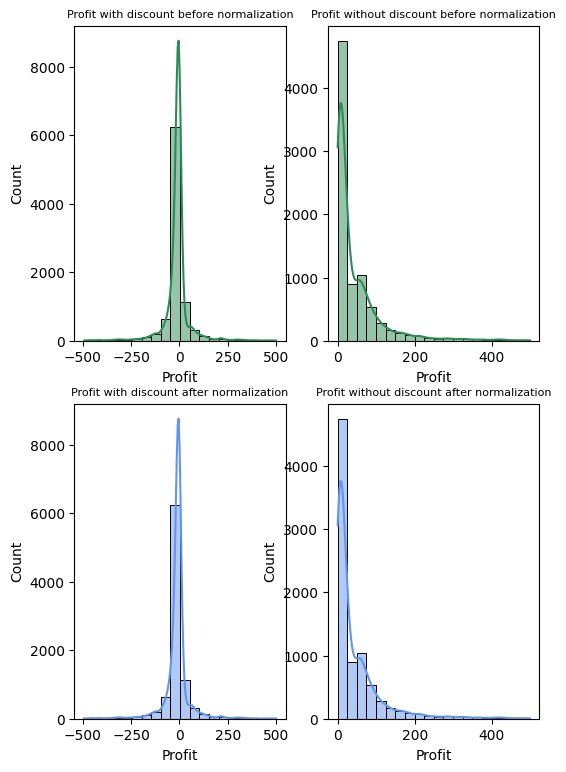

there is significant difference between sale office supplies with discount and without discount
according the average of sales, sales office supplies without discount has more profits
there is significant difference
p1 = data doesnt appear to be normally distributed.
p2 = data doesnt appear to be normally distributed.
p2 = data doesnt appear to be normally distributed.
p2 = data doesnt appear to be normally distributed.
there is significant difference between sale technology with discount and without discount
according the average of sales, sales technology supplies without discount has more profits


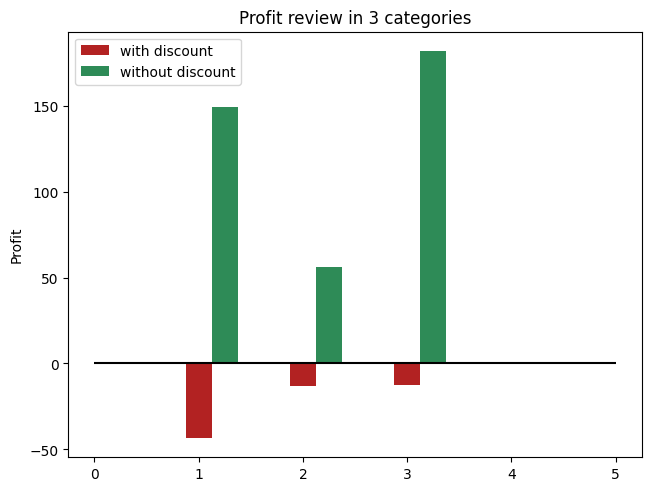

In [21]:
alpha = 0.05
categories = df['Category'].unique()

Cat_Furniture = df[df['Category'] == 'Furniture']
Fur_discount = Cat_Furniture[Cat_Furniture['Discount'] > 0]
Fur_without_dis = Cat_Furniture[Cat_Furniture['Discount'] == 0]

result = f_oneway(Fur_discount['Profit'], Fur_without_dis['Profit'])
if result.pvalue < alpha:
    print('there is significant difference')
else:
    print('there is no significant difference')

#H1: Discount has impact on sales
#H2: Discount has impact on sales

#Check normality
statistic, p_value1 = stats.shapiro(Fur_discount['Profit'])
if p_value1 >= alpha:
    print("p1 = does  appear to be normally distributed.")
else:
    print("p1 = data doesnt appear to be normally distributed.")

statistic, p_value2 = stats.shapiro(Fur_without_dis['Profit'])
if p_value2 >= alpha:
    print("p2 = data appears to be normally distributed.")
else:
    print("p2 = data doesnt appear to be normally distributed.")

#Normalization of furniture without_dis with parametic methods
transformed1, x = stats.yeojohnson(Fur_discount['Profit'])
statistic, p_value1 = stats.shapiro(transformed1)
if p_value1 >= alpha:
    print("p2 = data appears to be normally distributed.")
else:
    print("p2 = data doesnt appear to be normally distributed.")

transformed2, x = stats.yeojohnson(Fur_without_dis['Profit'])
statistic, p_value2 = stats.shapiro(transformed2)
if p_value2 >= alpha:
    print("p2 = data appears to be normally distributed.")
else:
    print("p2 = data doesnt appear to be normally distributed.")

#mean of profits
mean_Fur_1 = Fur_discount['Profit'].mean()
mean_Fur_2 = Fur_without_dis['Profit'].mean()

#mannwhitneyu of furniture 
stat,p_value_f = mannwhitneyu(Fur_discount['Profit'], Fur_without_dis['Profit'])
if p_value_f < alpha:
    print('there is significant difference between sale furniture with discount and without discount')
    if mean_Fur_1 > mean_Fur_2:
        print('according the average of sales, sales fruniture with discount has more profits')
    else:
        print('according the average of sales, sales fruniture without discount has more profits')
else:
    print('there is no significant difference')

"""
"""
#Office supplies
Cat_Office = df[df['Category'] == 'Office Supplies']
Office_discount = Cat_Office[Cat_Office['Discount'] > 0]
Office_without_dis = Cat_Office[Cat_Office['Discount'] == 0]

result = f_oneway(Office_discount['Profit'], Office_without_dis['Profit'])
if result.pvalue < alpha:
    print('there is significant difference')
else:
    print('there is no significant difference')

#H1: Discount has impact on sales
#H2: Discount has impact on sales


#Check normality
fig, axes = plt.subplots(2, 2, figsize = (6, 9))
limit_discount = Office_discount[(Office_discount['Profit'] >= -500) & (Office_discount['Profit'] <= 500)]
limit_w_discount = Office_without_dis[(Office_without_dis['Profit'] >= -500) & (Office_without_dis['Profit'] <= 500)]

ht0 = sns.histplot(data = limit_discount['Profit'] , kde=True,
                    bins = 20, color = 'seagreen', ax = axes[0,0])
ht0.set_title('Profit with discount before normalization', fontsize = 8)

ht1 = sns.histplot(data = limit_w_discount['Profit'] , kde=True,
                    bins = 20, color = 'seagreen', ax = axes[0,1])
ht1.set_title('Profit without discount before normalization', fontsize = 8)

#Normalization of Office supplies without_dis with parametic methods
transformed1, x = stats.yeojohnson(Office_discount['Profit'])
transformed2, x = stats.yeojohnson(Office_without_dis['Profit'])

limit_discount = Office_discount[(Office_discount['Profit'] >= -500) & (Office_discount['Profit'] <= 500)]
limit_w_discount = Office_without_dis[(Office_without_dis['Profit'] >= -500) & (Office_without_dis['Profit'] <= 500)]

ht2 = sns.histplot(data = limit_discount['Profit'] , kde=True,
                    bins = 20, color = 'cornflowerblue', ax = axes[1,0])
ht2.set_title('Profit with discount after normalization', fontsize = 8)

ht3 = sns.histplot(data = limit_w_discount['Profit'] , kde=True,
                    bins = 20, color = 'cornflowerblue', ax = axes[1,1])
ht3.set_title('Profit without discount after normalization', fontsize = 8)
plt.show()

#mean of profits
mean_office_1 = Office_discount['Profit'].mean()
mean_office_2 = Office_without_dis['Profit'].mean()
#mannwhitneyu of Ofiice supplies
stat,p_value_o = mannwhitneyu(Office_discount['Profit'], Office_without_dis['Profit'])
if p_value_o < alpha:
    print('there is significant difference between sale office supplies with discount and without discount')
    if mean_office_1 > mean_office_2:
        print('according the average of sales, sales office supplies with discount has more profits')
    else:
        print('according the average of sales, sales office supplies without discount has more profits')
else:
    print('there is no significant difference')



#Technology
Cat_Tech = df[df['Category'] == 'Technology']
Tech_discount = Cat_Tech[Cat_Tech['Discount'] > 0]
Tech_without_dis = Cat_Tech[Cat_Tech['Discount'] == 0]

result = f_oneway(Tech_discount['Profit'], Tech_without_dis['Profit'])
if result.pvalue < alpha:
    print('there is significant difference')
else:
    print('there is no significant difference')

#H1: Discount has impact on sales
#H2: Discount has impact on sales


#Check normality
statistic, p_value1 = stats.shapiro(Tech_discount['Profit'])
if p_value1 >= alpha:
    print("p1 = does  appear to be normally distributed.")
else:
    print("p1 = data doesnt appear to be normally distributed.")

statistic, p_value2 = stats.shapiro(Tech_without_dis['Profit'])
if p_value2 >= alpha:
    print("p2 = data appears to be normally distributed.")
else:
    print("p2 = data doesnt appear to be normally distributed.")

#Normalization of Technology without_dis with parametic methods
transformed1, x = stats.yeojohnson(Tech_discount['Profit'])
statistic, p_value1 = stats.shapiro(transformed1)
if p_value1 >= alpha:
    print("p2 = data appears to be normally distributed.")
else:
    print("p2 = data doesnt appear to be normally distributed.")

transformed2, x = stats.yeojohnson(Tech_without_dis['Profit'])
statistic, p_value2 = stats.shapiro(transformed2)
if p_value2 >= alpha:
    print("p2 = data appears to be normally distributed.")
else:
    print("p2 = data doesnt appear to be normally distributed.")

#mean of profits
mean_tech_1 = Tech_discount['Profit'].mean()
mean_tech_2 = Tech_without_dis['Profit'].mean()
#mannwhitneyu of Technology
stat,p_value_t = mannwhitneyu(Tech_discount['Profit'], Tech_without_dis['Profit'])
if p_value_t < alpha:
    print('there is significant difference between sale technology with discount and without discount')
    if mean_tech_1 > mean_tech_2:
        print('according the average of sales, sales technology with discount has more profits')
    else:
        print('according the average of sales, sales technology supplies without discount has more profits')
else:
    print('there is no significant difference')

fig, ax = plt.subplots(layout='constrained')
ax.bar(1, mean_Fur_1, width=0.25, color='firebrick', label='with discount')
ax.bar(1.25, mean_Fur_2, width=0.25, color='seagreen', label='without discount')
ax.bar(2, mean_office_1, width=0.25, color='firebrick')
ax.bar(2.25, mean_office_2, width=0.25, color='seagreen')
ax.bar(3, mean_tech_1, width=0.25, color='firebrick')
ax.bar(3.25, mean_tech_2, width=0.25, color='seagreen')
ax.set_ylabel('Profit')
ax.set_title('Profit review in 3 categories')
ax.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=5, colors='black', linestyles='-')

plt.show()


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش هم لازم است به جای بررسی تاثیر تخفیف بر روی کل مجموعه ها، هر کدام از دسته ها را برای تخفیف داشتن یا نداشتن جدا کرده و روی هر کدام تست فرض مورد نیاز را پیاده کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ابتدا با تست آنووا باید بررسی کنید که آیا این کار مفید است یا نه. سپس اگر این کار لازم بود، سه تست فرض بر روی هر سه گروه اقلام انجام دهید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [18]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["Statistics.ipynb", "SuperStore.csv"]

compress(file_names)

File Paths:
['Statistics.ipynb', 'SuperStore.csv']
